<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/ceylon_cold_stores_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
ceylon_cold_stores_plc_price_df = price_df[price_df['Company Name'] == "CEYLON COLD STORES PLC"]

In [ ]:
ceylon_cold_stores_plc_price_df['Trade Date'] = pd.to_datetime(ceylon_cold_stores_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-714310315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceylon_cold_stores_plc_price_df['Trade Date'] = pd.to_datetime(ceylon_cold_stores_plc_price_df['Trade Date']).dt.date


In [ ]:
ceylon_cold_stores_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
5906,2025-01-31,91.5,91.5,90.3,90.4,58,84931,7694149.1,CEYLON COLD STORES PLC,NaN
5907,2025-01-30,91.3,91.8,91.0,91.5,82,627772,57447212.4,CEYLON COLD STORES PLC,NaN
5908,2025-01-29,91.2,92.0,91.0,91.0,92,158319,14445454.6,CEYLON COLD STORES PLC,NaN
5909,2025-01-28,89.9,91.0,89.6,90.9,137,942646,84917607.2,CEYLON COLD STORES PLC,NaN
5910,2025-01-27,88.7,90.1,88.7,89.9,86,490652,44143115.0,CEYLON COLD STORES PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
7065,2020-01-09,800.0,800.0,790.0,799.8,6,129,103170.4,CEYLON COLD STORES PLC,NaN
7066,2020-01-08,800.0,800.0,788.0,789.9,20,53745,42988575.0,CEYLON COLD STORES PLC,NaN
7067,2020-01-07,800.0,800.0,798.0,777.8,5,29,23191.0,CEYLON COLD STORES PLC,NaN
7068,2020-01-03,796.0,809.9,775.0,777.8,11,207,161094.8,CEYLON COLD STORES PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

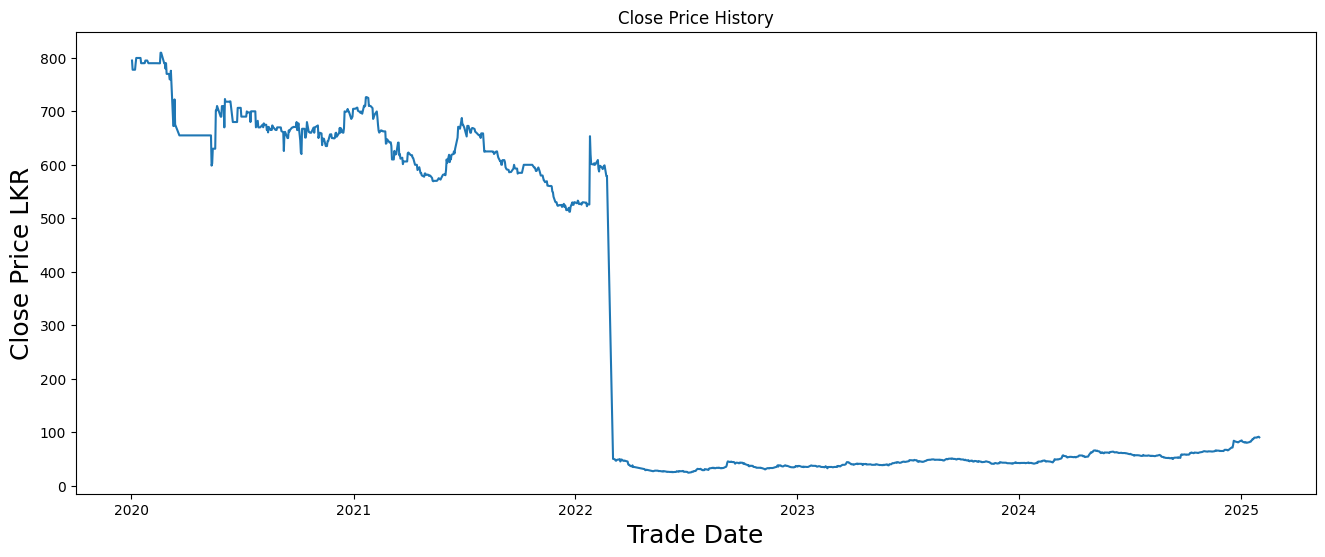

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(ceylon_cold_stores_plc_price_df['Trade Date'],ceylon_cold_stores_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = ceylon_cold_stores_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1106

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08428826],
       [0.08568882],
       [0.0850522 ],
       ...,
       [0.95951108],
       [0.95951108],
       [0.98141075]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.08428826, 0.08568882, 0.0850522 , 0.08492488, 0.08365164,
       0.08352432, 0.08365164, 0.08225108, 0.07970461, 0.0802139 ,
       0.07410237, 0.07410237, 0.07295646, 0.07117392, 0.07231984,
       0.07295646, 0.07181054, 0.07244716, 0.07422969, 0.07690349,
       0.07563025, 0.07499363, 0.07219251, 0.07282913, 0.0737204 ,
       0.07397504, 0.07613955, 0.06697224, 0.05996944, 0.0597148 ,
       0.05958747, 0.05602241, 0.05449453, 0.05373058, 0.05322129,
       0.0543672 , 0.0543672 , 0.05462185, 0.05322129, 0.05156608,
       0.05182073, 0.0516934 , 0.05194805, 0.05156608, 0.05245735,
       0.05245735, 0.05271199, 0.05194805, 0.05309396, 0.05182073,
       0.05105679, 0.05029284, 0.05067482, 0.05067482, 0.05067482,
       0.05092946, 0.05016552, 0.05042017, 0.05054749, 0.05067482])]
[np.float64(0.051311433664374836)]

[array([0.08428826, 0.08568882, 0.0850522 , 0.08492488, 0.08365164,
       0.08352432, 0.08365164, 0.08225108, 0.07970461, 0.0802139 ,
       0.07410237, 0.0

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0206
Epoch 2/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0024
Epoch 3/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0021
Epoch 4/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0011
Epoch 5/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 9.4236e-04
Epoch 6/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0012
Epoch 7/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0022
Epoch 8/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0027
Epoch 9/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0012
Epoch 10/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0011
Epoch 11/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0011
Epoch 12/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0014
Epoch 13/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.1965e-04
Epoch 14/20
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0014
Epoch 15/20
1

In [ ]:
model.save('/content/drive/My Drive/FYP/ceylon_cold_stores_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


np.float64(31.302467933076006)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.7208442133534783


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


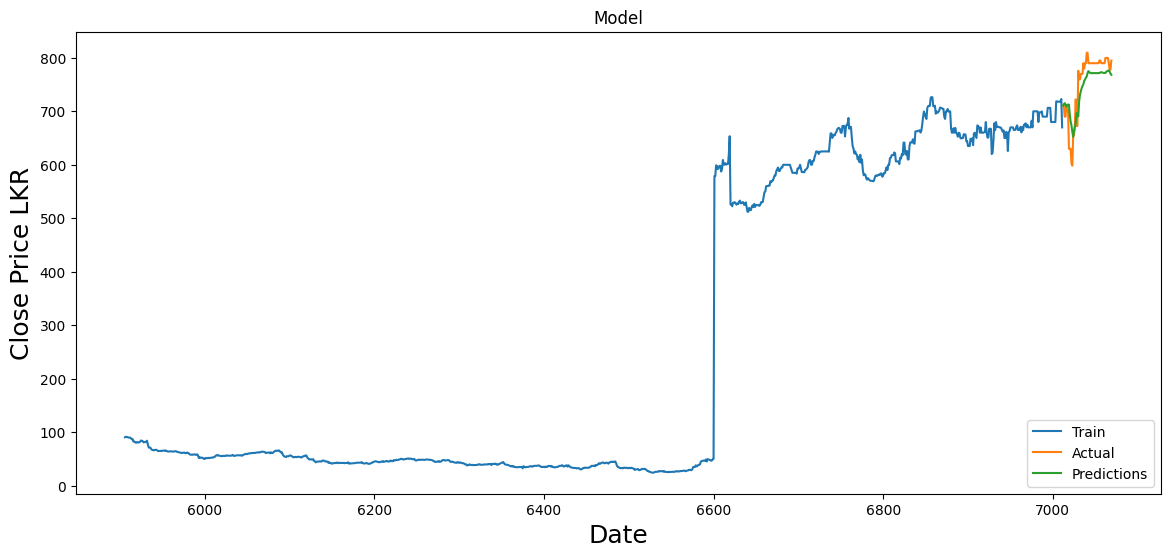

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()